In [5]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install sklearn

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
def create_model():
  # Create a multilayer perceptron
  model = Sequential()
  model.add(Input((22,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [0]:
df = pd.read_csv("data.csv")
labels = df["status"]
df = df.drop(columns="status")
df[df.columns] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[df.columns])

In [0]:
seed = 1337
X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size=0.2, random_state=seed)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=seed)

In [16]:
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=1000, callbacks=[early_stopping])

Train on 117 samples, validate on 39 samples
Epoch 1/1000
117/117 [==============================] - 0s 929us/sample - loss: 0.6857 - acc: 0.5470 - val_loss: 0.6442 - val_acc: 0.7692
Epoch 2/1000
117/117 [==============================] - 0s 139us/sample - loss: 0.6343 - acc: 0.7436 - val_loss: 0.6046 - val_acc: 0.7692
Epoch 3/1000
117/117 [==============================] - 0s 124us/sample - loss: 0.5978 - acc: 0.7436 - val_loss: 0.5726 - val_acc: 0.7692
Epoch 4/1000
117/117 [==============================] - 0s 129us/sample - loss: 0.5660 - acc: 0.7436 - val_loss: 0.5489 - val_acc: 0.7692
Epoch 5/1000
117/117 [==============================] - 0s 149us/sample - loss: 0.5459 - acc: 0.7436 - val_loss: 0.5305 - val_acc: 0.7692
Epoch 6/1000
117/117 [==============================] - 0s 145us/sample - loss: 0.5255 - acc: 0.7436 - val_loss: 0.5176 - val_acc: 0.7692
Epoch 7/1000
117/117 [==============================] - 0s 146us/sample - loss: 0.5129 - acc: 0.7436 - val_loss: 0.5080 - val_a

In [15]:
model.evaluate(X_test, Y_test)

39/39 [==============================] - 0s 225us/sample - loss: 0.1840 - acc: 0.9487


[0.18403061078144953, 0.94871795]

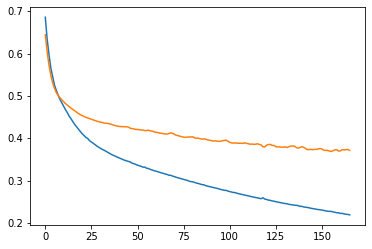

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

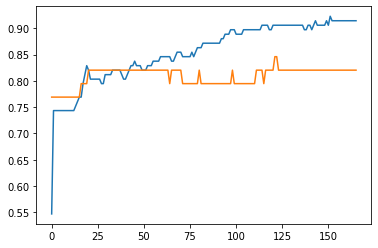

In [27]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])